In [1]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.stats import skew
# configure matplotlib to output inline
%matplotlib inline


In [2]:
hrds=pd.read_csv('heartdisease_data.csv.txt')
hrds.columns =['age','sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang','oldpeak','slope', 'ca', 'thal', 'num'] 
hrds

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,?,?,?,1
195,62,1,1,?,139,0,1,?,?,?,?,?,?,0
196,55,1,4,122,223,1,1,100,0,0,?,?,6,2
197,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [3]:
hrds.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [4]:
hrds.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object

In [5]:
hrds=hrds.replace('?', np.NaN)

In [6]:
hrds.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          197
thal        165
num           0
dtype: int64

In [7]:
# The "goal" field refers to the presence of heart disease in the patient
# so we can change num colmun (target)value  0- (no presence) ,1-4 (presence)
# target value will be categorical i.e, heart disease  presence/no presence
hrds=pd.DataFrame(hrds)
def GetTarget(quality) :
    if quality>= 1 :
        return 1  # 'presence'   
    
    else : 
        return 0   # 'no presence' 


In [8]:

hrds['num'] = hrds.apply(lambda x: GetTarget(x['num']), axis=1)



In [9]:
# handling numerirical null values 
# trestbps,chol,oldpeak,thalach

# # Impute with mean on trestbps
hrds['trestbps'] = hrds['trestbps'].fillna( hrds['trestbps'].astype(float).mean() )
hrds['chol'] = hrds['chol'].fillna( hrds['chol'].astype(float).mean() )
hrds['oldpeak'] = hrds['oldpeak'].fillna( hrds['oldpeak'].astype(float).mean() )

In [10]:
hrds['thalach'] = hrds['thalach'].fillna( hrds['thalach'].astype(float).mean() )

In [11]:
#For categorical features  are #fbs,exang,slope,ca,thal
# for each column, get value counts in decreasing order and take the index (value) of most common class

hrds['fbs']= hrds.apply(lambda x: hrds['fbs'].fillna(hrds['fbs'].value_counts().index[0]))

In [12]:

hrds['exang']= hrds.apply(lambda x: hrds['exang'].fillna(hrds['exang'].value_counts().index[0]))
hrds['slope']= hrds.apply(lambda x: hrds['slope'].fillna(hrds['slope'].value_counts().index[0]))
hrds['ca']= hrds.apply(lambda x: hrds['ca'].fillna(hrds['ca'].value_counts().index[0]))
hrds['thal']= hrds.apply(lambda x: hrds['thal'].fillna(hrds['thal'].value_counts().index[0]))

In [13]:
# NaN or Null values has been replaced 
hrds.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [14]:
hrds.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object

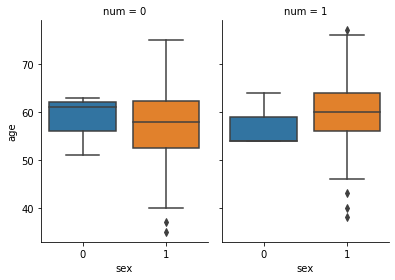

In [15]:
sns.catplot(x="sex", y="age",
               col="num",
                data=hrds, kind="box",
                height=4, aspect=.7);
# sex (1 = male; 0 = female)

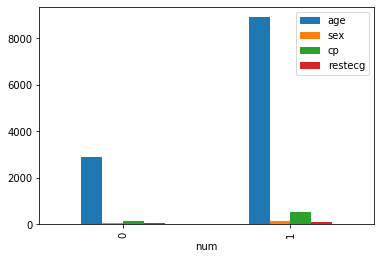

In [16]:
hrds_num = pd.DataFrame(hrds).groupby(['num'], as_index=False).sum()
hrds_num.plot.bar(x="num")

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


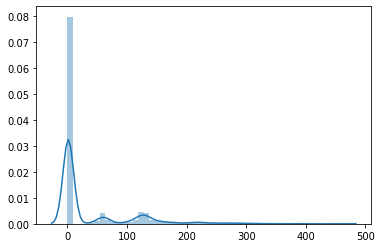

In [17]:
#check distribution 
sns.distplot(hrds)

In [18]:
# handling catagorical variables
hrds = pd.get_dummies(hrds, columns = ['cp','exang','slope','ca','thal','sex'], drop_first = True)


In [19]:
hrds['trestbps'] =  hrds['trestbps'].astype(int)
hrds['chol'] = hrds['chol'].astype(int)
hrds['thalach'] =  hrds['thalach'].astype(int)
hrds['oldpeak'] = hrds['oldpeak'].astype(float)
hrds['fbs'] =  hrds['fbs'].astype(int)

In [20]:
# Lets Check Outliers in the Dataset 

from scipy.stats import zscore
print('Before zscore',hrds.shape)
z_score=abs(zscore(hrds))
hrds=hrds.iloc[(z_score<3).all(axis=1)]
print('After zscore',hrds.shape)

Before zscore (199, 17)
After zscore (165, 17)


In [21]:
x_data=hrds.drop('num',axis=1)
x_data

,age,trestbps,chol,fbs,restecg,thalach,oldpeak,cp_2,cp_3,cp_4,exang_1,slope_2,slope_3,thal_6,thal_7,sex_1
0,44,130,209,0,1,127,0.000000,0,0,1,0,1,0,0,1,1
1,60,132,218,0,1,140,1.500000,0,0,1,1,0,1,0,1,1
2,55,142,228,0,1,149,2.500000,0,0,1,1,0,0,0,1,1
3,66,110,213,1,2,99,1.300000,0,1,0,1,1,0,0,1,1
4,66,120,0,0,1,120,-0.500000,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,62,160,254,1,1,108,3.000000,0,0,1,1,1,0,0,1,1
191,53,144,300,1,1,128,1.500000,0,0,1,1,1,0,0,1,1
192,62,158,170,0,1,138,0.000000,0,0,1,1,1,0,0,1,1
195,62,133,139,0,1,122,1.309091,0,0,0,1,1,0,0,1,1


In [22]:
y=hrds['num']
y=np.array(y).reshape(-1,1)

In [23]:
x_data.dtypes

age           int64
trestbps      int32
chol          int32
fbs           int32
restecg       int64
thalach       int32
oldpeak     float64
cp_2          uint8
cp_3          uint8
cp_4          uint8
exang_1       uint8
slope_2       uint8
slope_3       uint8
thal_6        uint8
thal_7        uint8
sex_1         uint8
dtype: object

In [24]:
x_data.skew()

age        -0.281616
trestbps    0.457495
chol       -0.494560
fbs         0.833833
restecg     0.407445
thalach    -0.185395
oldpeak     0.353209
cp_2        0.000000
cp_3        1.252501
cp_4       -0.962154
exang_1    -1.421328
slope_2    -1.174767
slope_3     1.835177
thal_6      0.000000
thal_7      0.000000
sex_1       0.000000
dtype: float64

In [25]:

x_data['oldpeak'] =round(x_data['oldpeak'],2)

In [26]:
# Normalize
# x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
x = x_data

In [27]:

x['oldpeak'] =round(x['oldpeak'],2)

In [28]:
print(x.shape)
print(y.shape)

(165, 16)
(165, 1)


In [29]:
x

,age,trestbps,chol,fbs,restecg,thalach,oldpeak,cp_2,cp_3,cp_4,exang_1,slope_2,slope_3,thal_6,thal_7,sex_1
0,44,130,209,0,1,127,0.00,0,0,1,0,1,0,0,1,1
1,60,132,218,0,1,140,1.50,0,0,1,1,0,1,0,1,1
2,55,142,228,0,1,149,2.50,0,0,1,1,0,0,0,1,1
3,66,110,213,1,2,99,1.30,0,1,0,1,1,0,0,1,1
4,66,120,0,0,1,120,-0.50,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,62,160,254,1,1,108,3.00,0,0,1,1,1,0,0,1,1
191,53,144,300,1,1,128,1.50,0,0,1,1,1,0,0,1,1
192,62,158,170,0,1,138,0.00,0,0,1,1,1,0,0,1,1
195,62,133,139,0,1,122,1.31,0,0,0,1,1,0,0,1,1


In [30]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=42)
# default random random_state=42
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.22)

In [31]:
# using maxr2_score function will findout random_state

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

def maxr2_score(regr,x,y):
    max_r_score=0
    final_r_state=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
#         print("r2 score corresponding to",r_state," is " ,r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to",final_r_state," is ",max_r_score)
    return final_r_state

# Define Classification Model

In [32]:
# import Libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier
#  Cross Validation Libraries 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

KNN=KNeighborsClassifier(n_neighbors=6)
sv=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()
Rf=RandomForestClassifier(n_estimators = 1000, random_state = 1)


In [33]:
models=[]
models.append(("KNeighborsClassifier",KNN))
models.append(("SVC",sv))
models.append(("LogisticRegression",LR))
models.append(("DecisionTreeClassifier",DT))
models.append(("GaussianNB",GNB))
models.append(("RandomForestClassifier",Rf))


*********** KNeighborsClassifier ************


max r2 score corresponding to 43  is  0.09340659340659352


random state value = 43
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')


Accuracy_score=  0.8108108108108109


Cross_Val_Score= 0.7322303921568627


roc_auc_score= 0.6077586206896552


classification_report
               precision    recall  f1-score   support

           0       0.67      0.25      0.36         8
           1       0.82      0.97      0.89        29

   micro avg       0.81      0.81      0.81        37
   macro avg       0.75      0.61      0.63        37
weighted avg       0.79      0.81      0.78        37



[[ 2  6]
 [ 1 28]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********** SVC ************


max r2 score corresponding to 49  is  0.05714285714285705


random state value = 49
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0

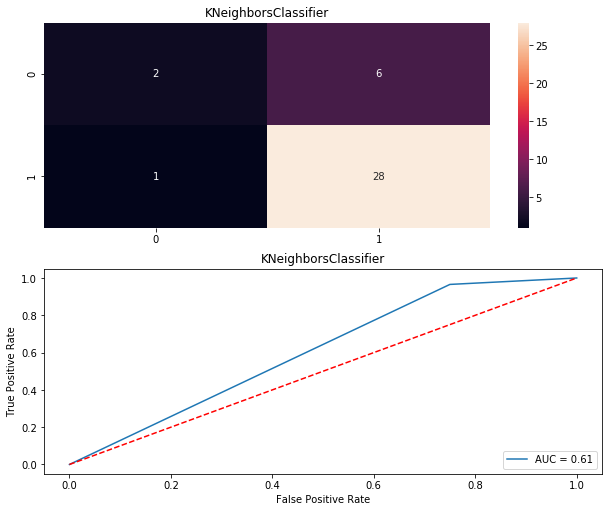

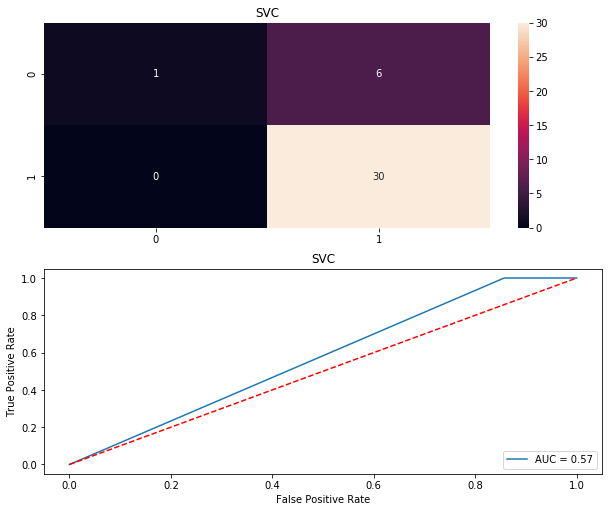

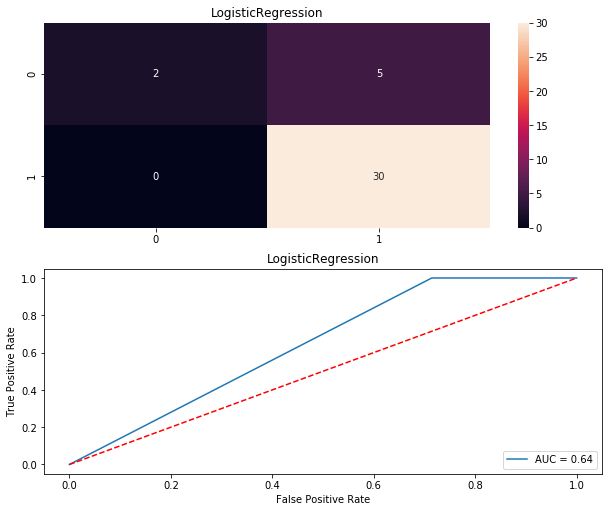

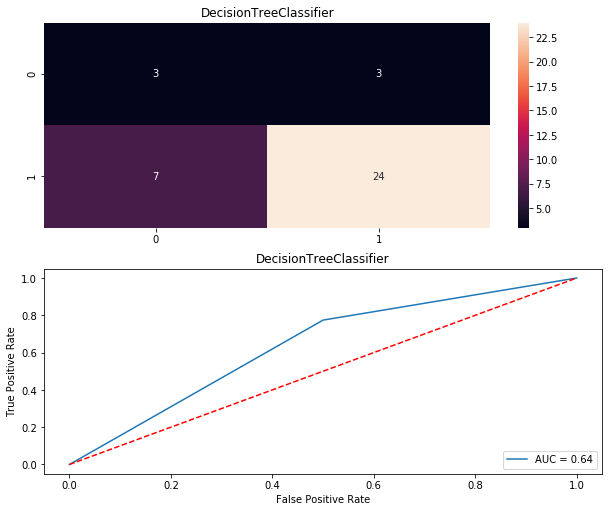

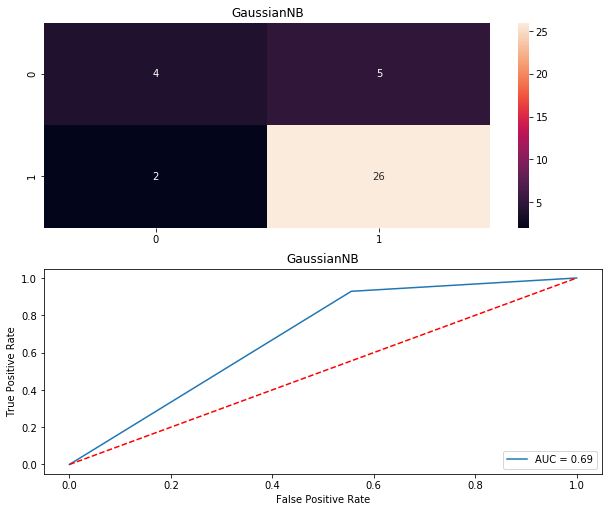

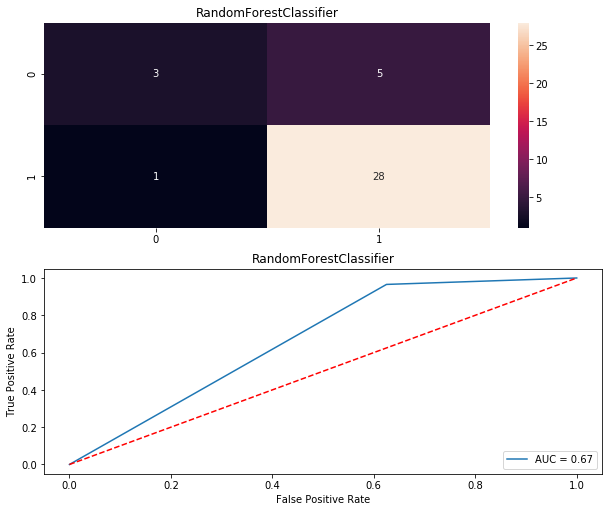

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('***********',name,'************')
    print('\n')
    r_state=maxr2_score(model,x,y)
    print('\n')
    print('random state value =',r_state)
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score= ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_Val_Score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')
     


In [35]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_Score':cvs,'ROC_Auc_Curve':rocscore})
result

,Model,Accuracy_score,Cross_val_Score,ROC_Auc_Curve
0,KNeighborsClassifier,81.081081,73.223039,60.775862
1,SVC,83.783784,78.830882,57.142857
2,LogisticRegression,86.486486,78.085784,64.285714
3,DecisionTreeClassifier,72.972973,69.147059,63.709677
4,GaussianNB,81.081081,71.615196,68.650794
5,RandomForestClassifier,83.783784,75.732843,67.025862


# Boost the Model Using Ensemble Techniques

In [36]:
# GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(train_x,train_y)
ad_pred=gb.predict(test_x)
print(accuracy_score(test_y,ad_pred))
print(confusion_matrix(test_y,ad_pred))
print(classification_report(test_y,ad_pred))

0.7837837837837838
[[ 0  3]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.91      0.85      0.88        34

   micro avg       0.78      0.78      0.78        37
   macro avg       0.45      0.43      0.44        37
weighted avg       0.83      0.78      0.81        37



In [37]:
# AdaBoostClassifier

from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
svc=SVC(probability=True,kernel='linear')
svc_ad=AdaBoostClassifier(n_estimators=50,base_estimator=svc)
svc_ad.fit(train_x,train_y)
svc_ad_pred=svc_ad.predict(test_x)
print(accuracy_score(test_y,svc_ad_pred))
print(confusion_matrix(test_y,svc_ad_pred))
print(classification_report(test_y,svc_ad_pred))

0.918918918918919
[[ 0  3]
 [ 0 34]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.92      1.00      0.96        34

   micro avg       0.92      0.92      0.92        37
   macro avg       0.46      0.50      0.48        37
weighted avg       0.84      0.92      0.88        37



In [38]:
Rf=RandomForestClassifier(n_estimators = 1000, random_state = 1)
ad=AdaBoostClassifier(n_estimators=50,base_estimator=Rf)
ad.fit(train_x,train_y)
ad_pred=ad.predict(test_x)
print(accuracy_score(test_y,ad_pred))
print(confusion_matrix(test_y,ad_pred))
print(classification_report(test_y,ad_pred))

0.7837837837837838
[[ 0  3]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.91      0.85      0.88        34

   micro avg       0.78      0.78      0.78        37
   macro avg       0.45      0.43      0.44        37
weighted avg       0.83      0.78      0.81        37



In [39]:
# Saving the Model with MAX Accuracy score value 
from sklearn.externals import joblib
joblib.dump(svc_ad,'AdaBoostClassifier_Model')
OuModel=joblib.load('AdaBoostClassifier_Model')
